<h1>Visualizing data of Toronto:</h1>

<p>
    Importing necessary libraries:
</p>

In [17]:
import random
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
print('Libraries imported.')

Libraries imported.


<h5>Loading cleaned data into dataframes:</h5>

<p>
    Deleting non-numeric columns as K-means can only process numeric values.
</p>

In [9]:
data=pd.read_csv('/resources/data/Toronto_Geo_data.csv')
data=data.drop(["Postal code", "Borough", "Neighborhood"], axis=1)
data.head()

,Latitude,Longitude
0,43.728020,-79.388790
1,43.711695,-79.416936
2,43.712751,-79.390197
3,43.696948,-79.411307
4,43.715383,-79.405678


In [10]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,0:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.44845406,  0.08650566],
       [ 0.13574746, -0.20463387],
       [ 0.1559801 ,  0.07194739],
       [-0.14672415, -0.1464132 ],
       [ 0.20639984, -0.0881884 ],
       [-0.61098304, -0.0881884 ],
       [-0.00542705,  0.08650566],
       [-0.28795421,  0.14474494],
       [-0.34851996, -0.0299605 ],
       [-0.96437519,  0.37773518],
       [-0.81034434,  0.07922652],
       [-0.90879146,  0.18842596],
       [-1.01735586,  0.22482887],
       [-1.14613182,  0.24667041],
       [-0.89364811,  0.10106496],
       [-0.67165797, -0.26285143],
       [-1.03502949,  0.1301846 ],
       [-1.22188881,  0.15930528],
       [-1.10004669,  0.16112481],
       [-1.08047678,  0.17932523],
       [-0.80279565, -0.0299605 ],
       [-0.9845676 , -0.0299605 ],
       [-1.44923065,  0.02827051],
       [-0.47972085,  0.20298733],
       [-1.11425148,  0.23074465],
       [-0.70182592,  0.30491901],
       [-1.0760579 ,  0.15384464],
       [-0.74218585,  0.14474494],
       [-0.54111407,

<h5> Perofrming K-means clustering operation on data:</h5>

<p>
    Here, I am creating 3 clusters and gonna print the labels it is assigned to the values.
</p>


In [13]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 2 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 0 0 0]


In [15]:
data["Labels"] = labels
data.tail()

,Latitude,Longitude,Labels
98,43.693781,-79.428191,2
99,43.689026,-79.453512,0
100,43.691116,-79.476013,0
101,43.673185,-79.487262,0
102,43.706876,-79.518188,0


In [16]:
data.groupby('Labels').mean()

,Latitude,Longitude
Labels,,
0,43.691424,-79.514031
1,43.768056,-79.301355
2,43.673918,-79.378842


<h5> Visualizing clustered data using swarmplot of Seaborn library:</h5>

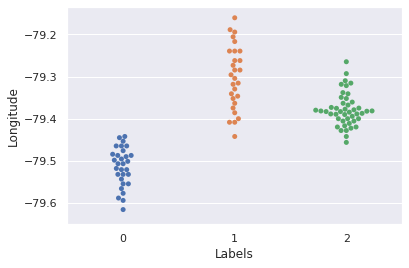

In [45]:
sns.set()
sns.swarmplot(x="Labels", y="Longitude", data=data)

<h5> Trying the same thing with 3D plot visualization of the data using scatter plot: </h5>

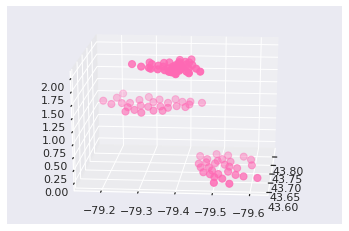

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Latitude'], data['Longitude'],data["Labels"] , c='hotpink', s=50)
ax.view_init(20, 185)
plt.show()